# Wine Quality Prediction



### Description: The focus is on predicting the quality of wine based on its chemical characteristics, offering a real-world application of machine learning in the context of viticulture. The dataset encompasses diverse chemical attributes, including density and acidity, which serve as the features for three distinct classifier models.


### Dataset Link: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset



####  1. Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 2. Load the dataset 


In [2]:
df = pd.read_csv('WineQT.csv')  
df.head() # Display the first 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
df.info()  # Display basic information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [4]:
df.describe()   # Descriptive Statistics

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


#### 3.  Data Cleaning: Handling missing values


In [5]:
df.isnull().sum()  # Checking for missing values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

Insights: There is no missing values in the dataset.

#### 4. Distribution of Target Variable (quality)

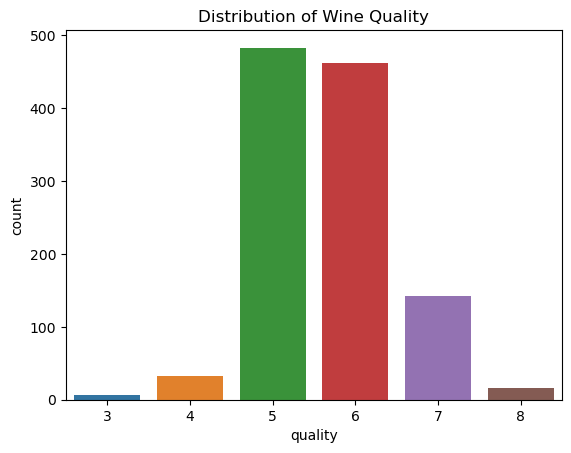

In [6]:
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()

Insights: The target variable (quality) is imbalanced, with most wines rated between 5 and 7.

#### 5. Correlation Matrix


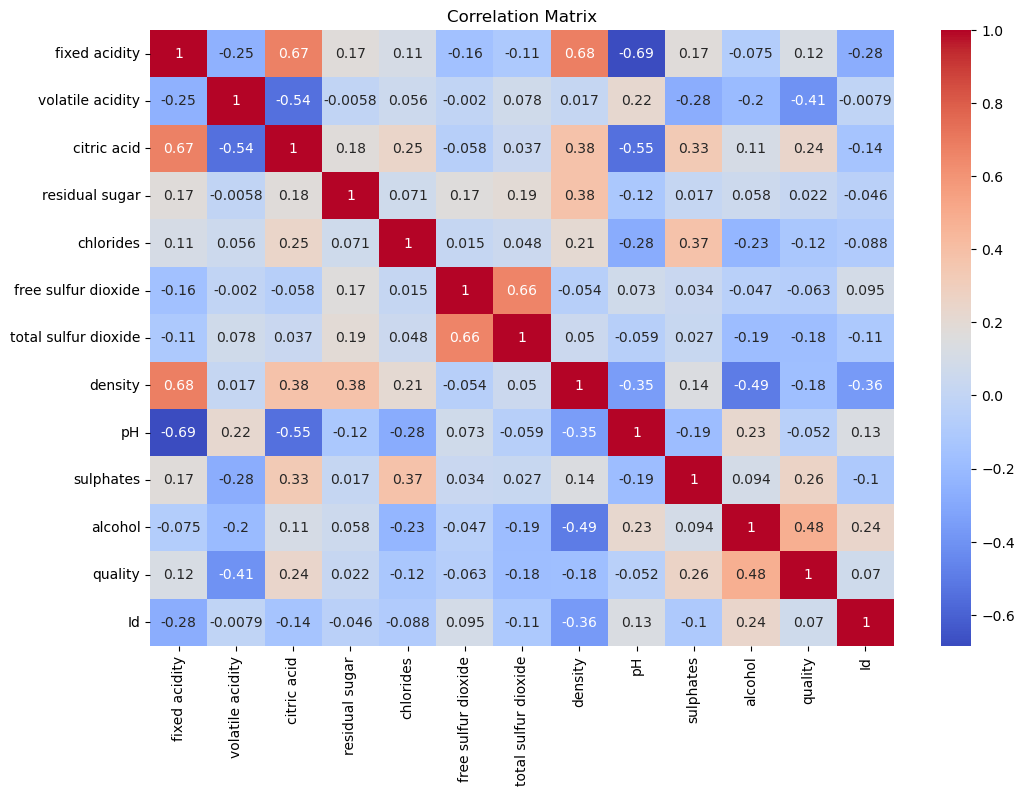

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Insights: Features like alcohol, sulphates, and citric acid have a positive correlation with quality.

Features like volatile acidity and density have a negative correlation with quality.

#### 6. Pairplot for Key Features


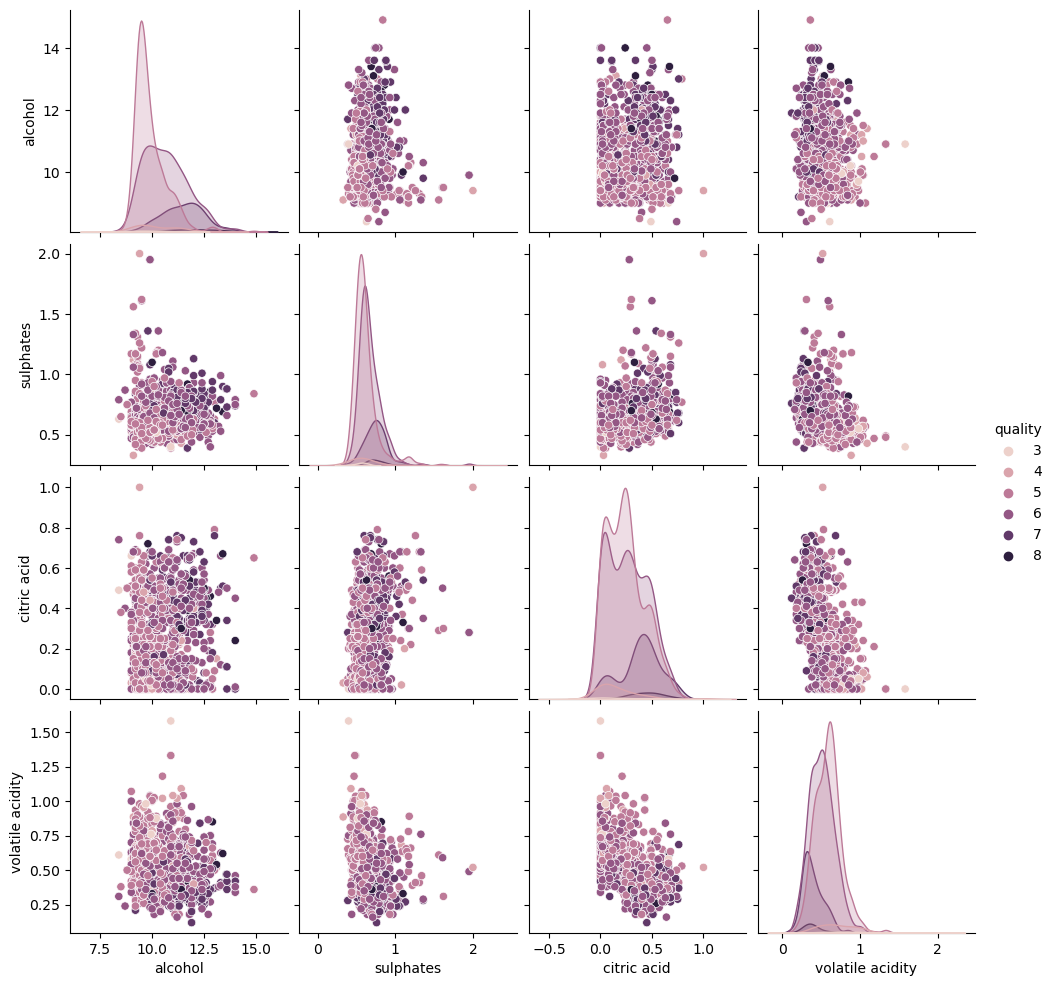

In [8]:
sns.pairplot(df[['alcohol', 'sulphates', 'citric acid', 'volatile acidity', 'quality']], hue='quality')
plt.show()

Insights: Higher alcohol content and sulphates are associated with better-quality wines.

Higher volatile acidity is associated with lower-quality wines.

#### 7. Data Preprocessing


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### 7.1 Feature Selection



Drop the Id column as it is not relevant for prediction.

In [10]:
df = df.drop('Id', axis=1)
X = df.drop('quality', axis=1)
y = df['quality']          # Separate features (X) and target (y)

In [11]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [12]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1143, dtype: int64

#### 7.2  Train-Test Split


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 7.3  Feature Scaling


In [14]:
# Scale the features to ensure all features contribute equally to the model.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### 8. Model Training and Evaluation



We will train and evaluate three classifier models: Random Forest, SGD, and SVC.

#### 8.1 Random Forest Classifier


In [15]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.6986899563318777
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.71      0.80      0.75        96
           6       0.68      0.66      0.67        99
           7       0.72      0.69      0.71        26
           8       0.00      0.00      0.00         2

    accuracy                           0.70       229
   macro avg       0.42      0.43      0.43       229
weighted avg       0.67      0.70      0.68       229

Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 77 18  1  0]
 [ 0 28 65  6  0]
 [ 0  0  8 18  0]
 [ 0  0  2  0  0]]


Insights: Random Forest achieves high accuracy due to its ability to handle non-linear relationships. The model performs well across most quality classes.

#### 8.2 Stochastic Gradient Descent (SGD) Classifier


In [16]:
sgd_model = SGDClassifier(random_state=42)
sgd_model.fit(X_train, y_train)
y_pred_sgd = sgd_model.predict(X_test)

# Evaluate the model
print("SGD Accuracy:", accuracy_score(y_test, y_pred_sgd))
print("Classification Report:\n", classification_report(y_test, y_pred_sgd))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_sgd))

SGD Accuracy: 0.5021834061135371
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         6
           5       0.57      0.80      0.67        96
           6       0.53      0.24      0.33        99
           7       0.30      0.54      0.39        26
           8       0.00      0.00      0.00         2

    accuracy                           0.50       229
   macro avg       0.24      0.26      0.23       229
weighted avg       0.51      0.50      0.47       229

Confusion Matrix:
 [[ 0  0  0  0  0  0]
 [ 0  0  4  1  1  0]
 [ 1  0 77 13  5  0]
 [ 0  1 48 24 24  2]
 [ 0  0  5  7 14  0]
 [ 0  0  0  0  2  0]]


Insights: SGD performs moderately well but struggles with imbalanced classes.

#### 8.3 Support Vector Classifier (SVC)


In [17]:
svc_model = SVC(random_state=42)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)

# Evaluate the model
print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))

SVC Accuracy: 0.6375545851528385
Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.59      0.69      0.64        99
           7       0.54      0.27      0.36        26
           8       0.00      0.00      0.00         2

    accuracy                           0.64       229
   macro avg       0.37      0.34      0.34       229
weighted avg       0.61      0.64      0.62       229

Confusion Matrix:
 [[ 0  3  3  0  0]
 [ 0 71 25  0  0]
 [ 0 26 68  5  0]
 [ 0  1 18  7  0]
 [ 0  0  1  1  0]]


Insights: SVC performs well but is computationally expensive.

#### 9. Feature Importance Analysis


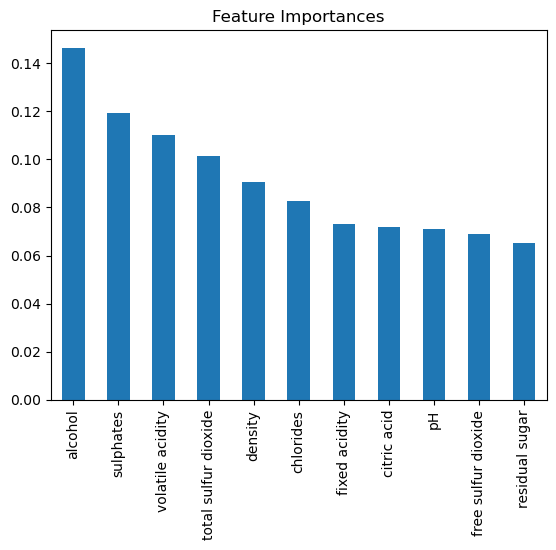

In [18]:
# We will analyze the importance of features using the Random Forest model.

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importances')
plt.show()

Insights: alcohol, sulphates, and volatile acidity are the most important features for predicting wine quality.

Conclusions from the Analysis: 

1. Random Forest performed the best among the three models, with an accuracy of 69.87%.

2. SGD had the lowest accuracy (50.22%), likely due to its sensitivity to feature scaling and class imbalance.

3. SVC achieved moderate accuracy (63.76%).

4. alcohol, sulphates, and volatile acidity are the most important features for predicting wine quality.

5. Positive correlation: alcohol, sulphates, and citric acid are associated with better-quality wines.

6. Negative correlation: volatile acidity and density are associated with lower-quality wines.